In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('E:\Pandas\stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [8]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [9]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
#From the above description of numerical data , all mean are very close to each other  between 66 to 69.
#all the std are close between 14 to 15.
#in math min 0 and other 17 and 10.


In [17]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='object']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='object']

In [18]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [19]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [20]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3

In [21]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='average_score', ylabel='Count'>

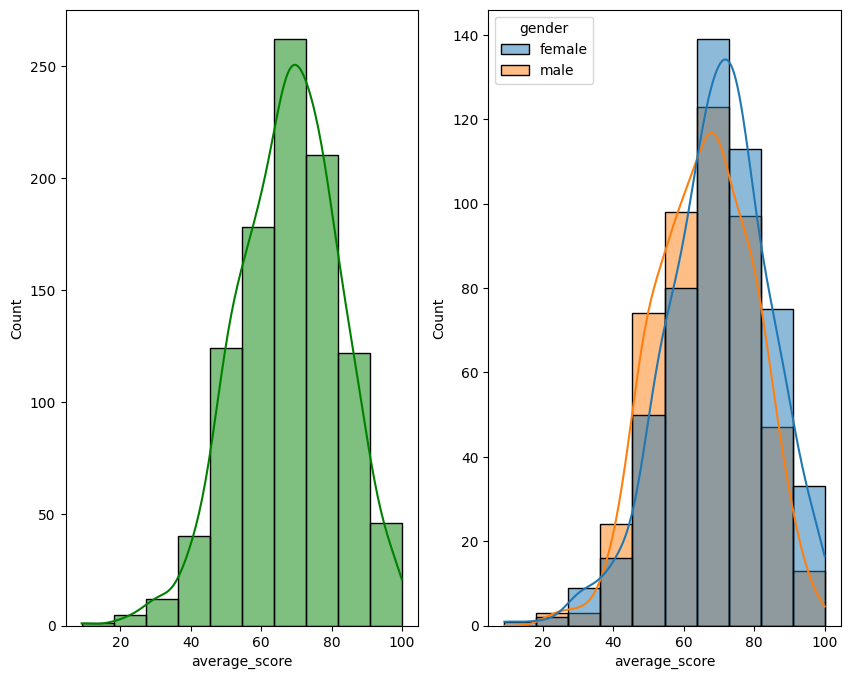

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,bins=10,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,bins=10,color='g',hue='gender')

<Axes: xlabel='average_score', ylabel='Count'>

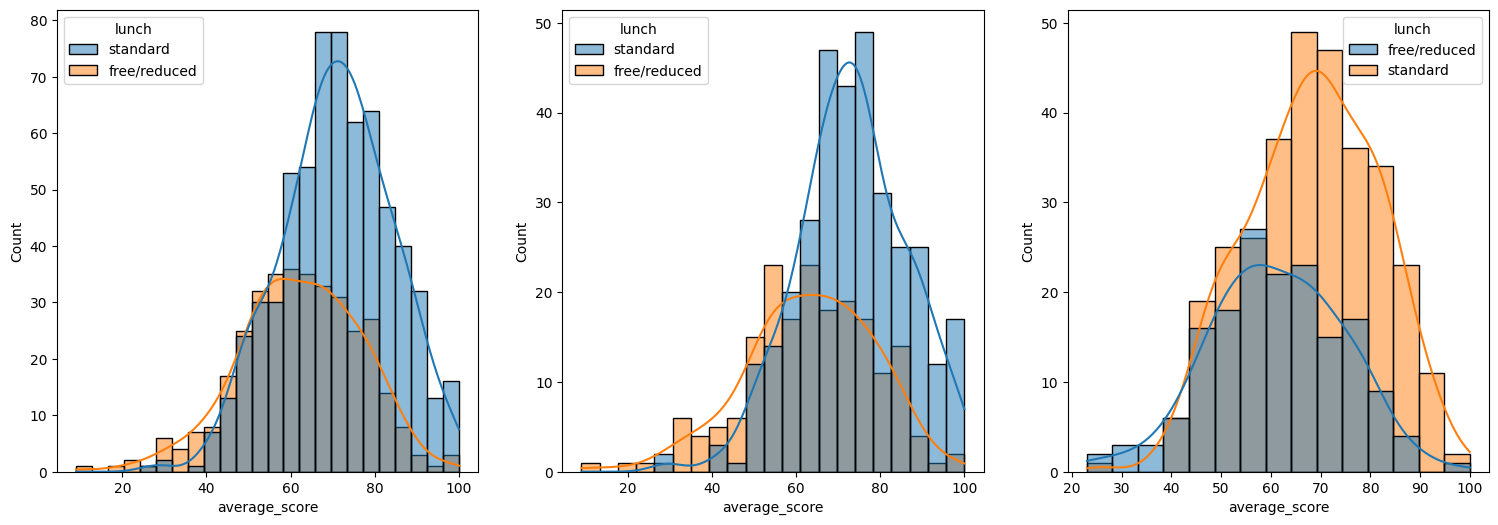

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x=df['average_score'],kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x=df['average_score'],kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x=df['average_score'],kde=True,hue='lunch')

In [31]:
df['average_score'].value_counts()

average_score
68.000000    15
66.000000    14
77.333333    14
68.333333    13
70.000000    12
             ..
92.333333     1
31.666667     1
37.333333     1
9.000000      1
18.333333     1
Name: count, Length: 194, dtype: int64

<Axes: xlabel='average_score', ylabel='Count'>

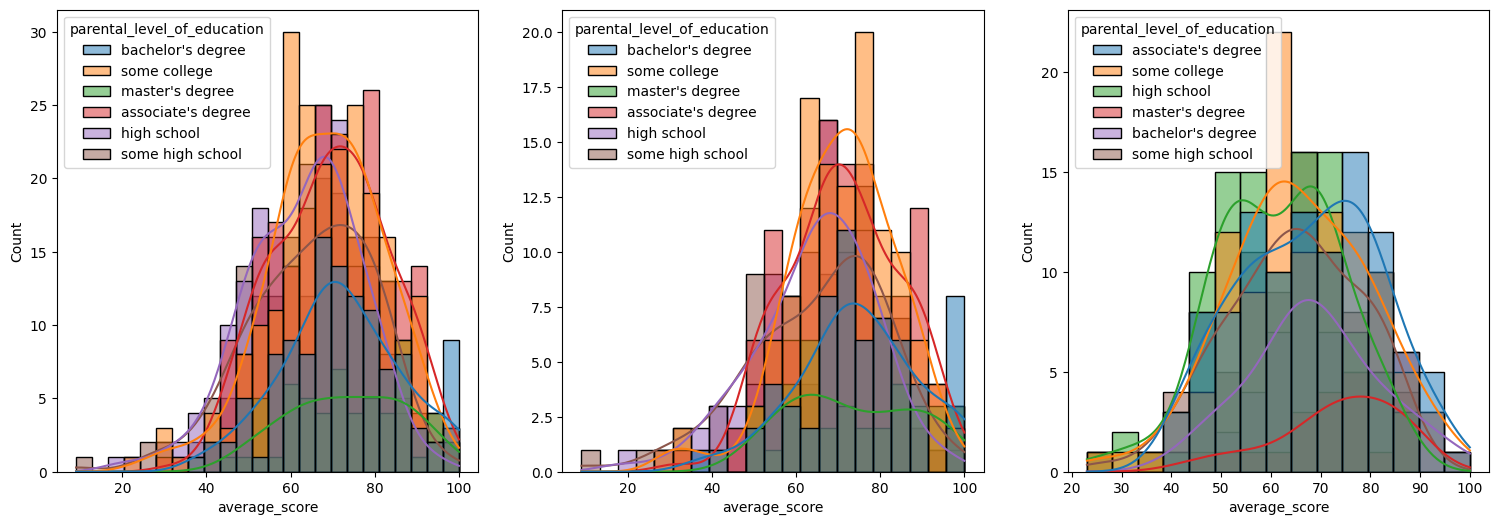

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x=df['average_score'],kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x=df['average_score'],kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x=df['average_score'],kde=True,hue='parental_level_of_education')